In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df= pd.read_csv("Data_Train.csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

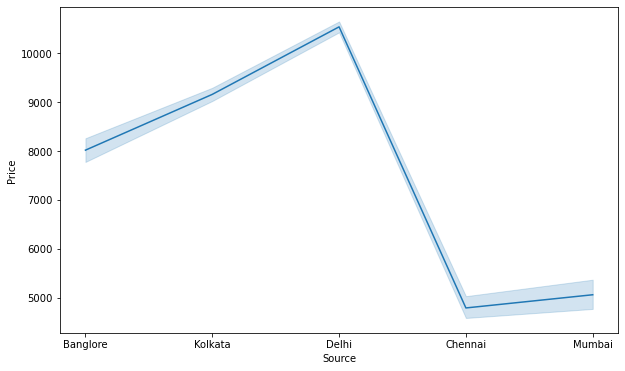

In [7]:
plt.figure(figsize=[10,6])
sn.lineplot(df['Source'],df['Price'])

<AxesSubplot:xlabel='Destination', ylabel='Price'>

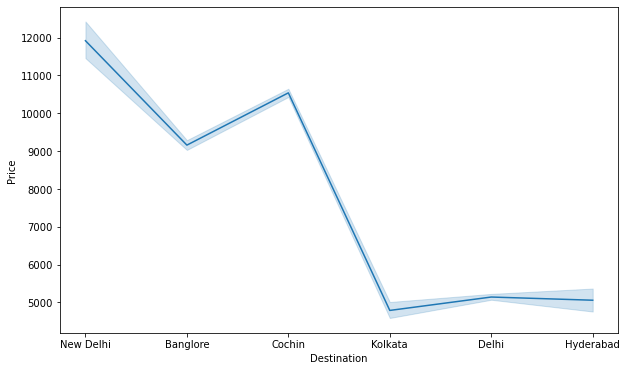

In [8]:
plt.figure(figsize=[10,6])
sn.lineplot(df['Destination'],df['Price'])

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

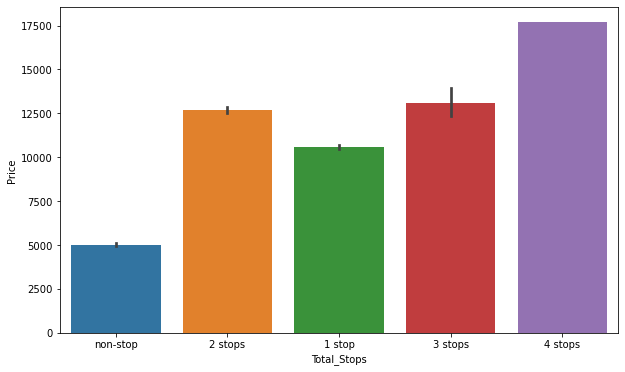

In [9]:
plt.figure(figsize=[10,6])
sn.barplot(df['Total_Stops'],df['Price'])

<AxesSubplot:xlabel='Airline', ylabel='Price'>

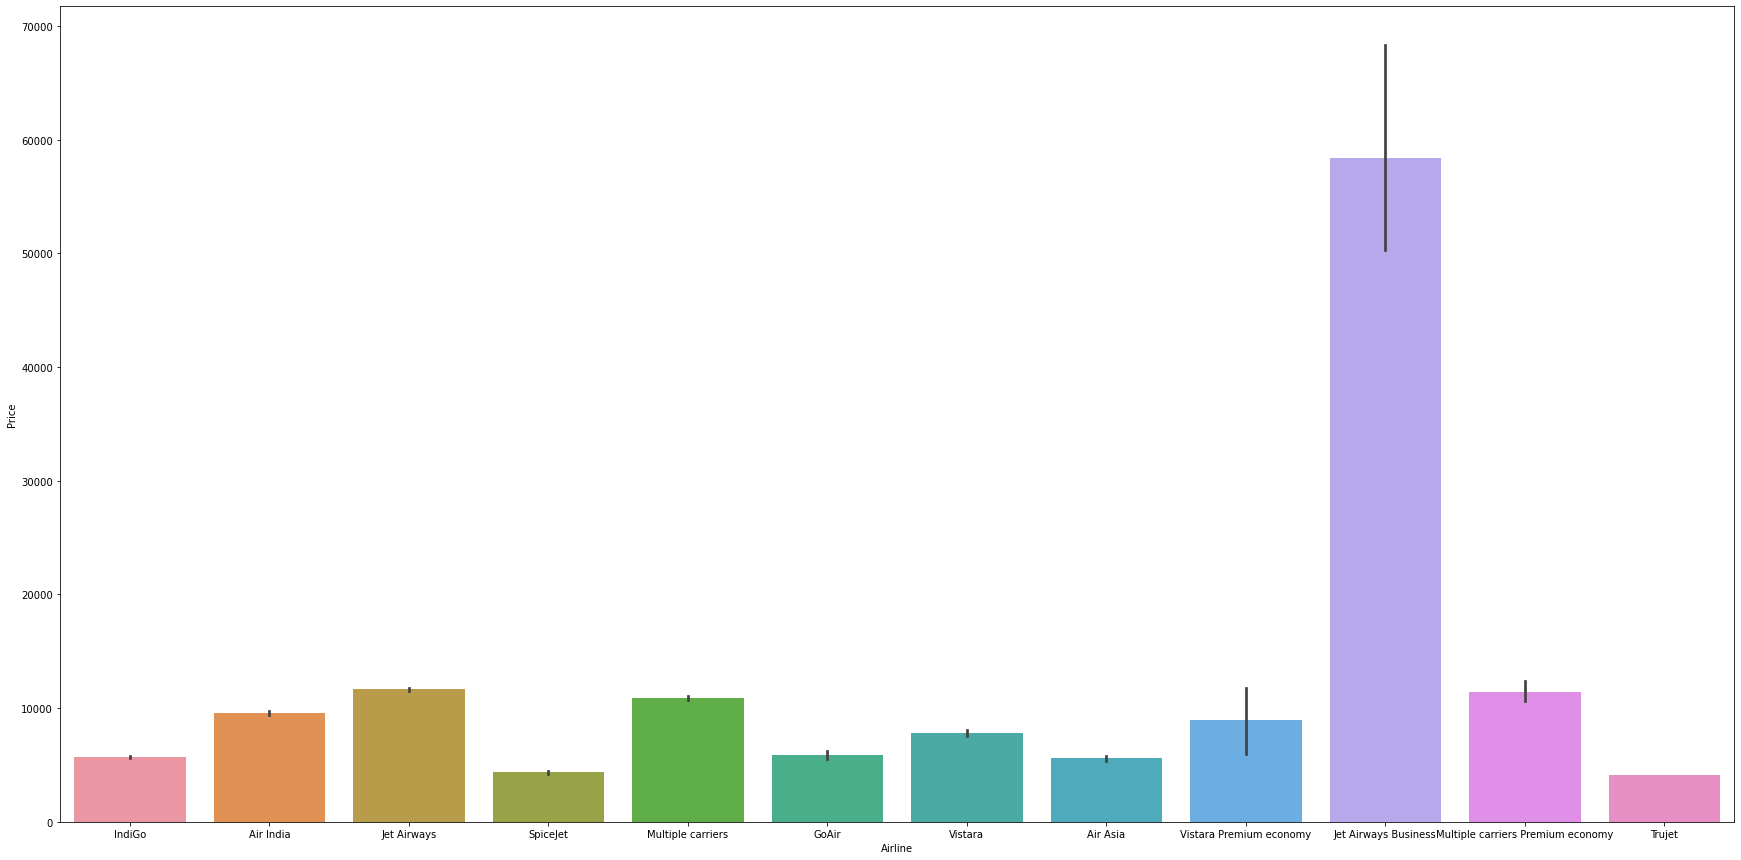

In [10]:
plt.figure(figsize=[30,15])
sn.barplot(df['Airline'],df['Price'])

The price for jet airways business is maximum and spicejet and trujet are minimum

In [11]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [12]:
#Extracting day and month from Date
df['Month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['Day'] = pd.DatetimeIndex(df['Date_of_Journey']).day
df['Year'] = pd.DatetimeIndex(df['Date_of_Journey']).year

In [13]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Month               int64
Day                 int64
Year                int64
dtype: object

In [14]:
df=df.drop("Date_of_Journey",axis=1)

<AxesSubplot:xlabel='Month', ylabel='Price'>

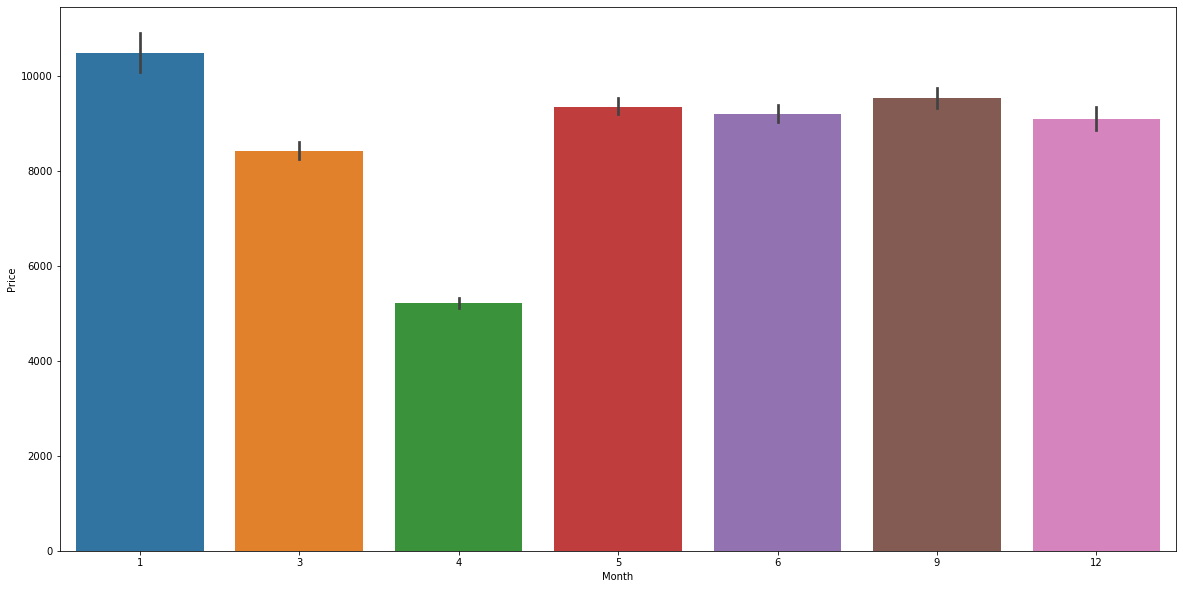

In [15]:
plt.figure(figsize=[20,10])
sn.barplot(df['Month'],df['Price'])

The prices are maximum in the month of Jan,May,June,Sepetmber and December and minimum in the month of May.

<AxesSubplot:xlabel='Day', ylabel='Price'>

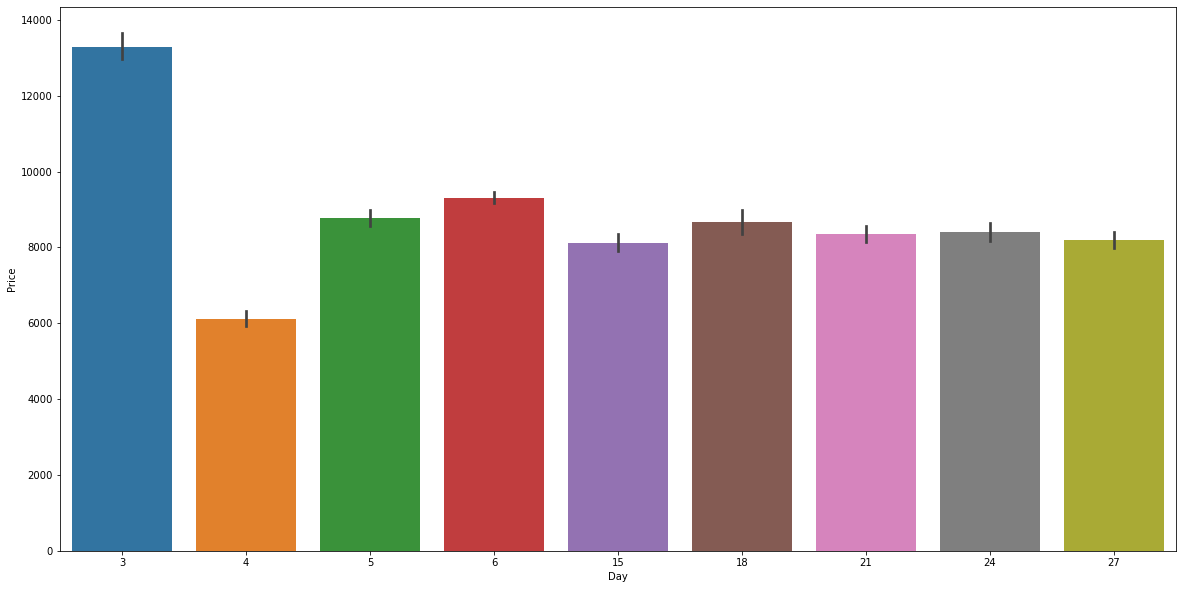

In [16]:
plt.figure(figsize=[20,10])
sn.barplot(df['Day'],df['Price'])

In [17]:
df.nunique()

Airline              12
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
Month                 7
Day                   9
Year                  1
dtype: int64

We can see that the year is common to all the rows, so we can get rid of it.

In [18]:
df=df.drop("Year",axis=1)

In [19]:
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])

In [20]:
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [21]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Month              0
Day                0
dtype: int64

In [22]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Month               int64
Day                 int64
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col = ['Airline','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info']
for i in col:
    df[i] = le.fit_transform(df[i])
df
   

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
0,3,0,5,18,211,233,240,4,8,3897,3,24
1,1,3,0,84,31,906,336,1,8,7662,1,5
2,4,2,1,118,70,413,106,1,8,13882,9,6
3,3,3,0,91,164,1324,311,0,8,6218,12,5
4,3,0,5,29,149,1237,303,0,8,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,183,1259,236,4,8,4107,9,4
10679,1,3,0,64,193,1305,237,4,8,4145,4,27
10680,4,0,2,18,58,824,280,4,8,7229,4,27
10681,10,0,5,18,92,938,238,4,8,12648,1,3


<AxesSubplot:>

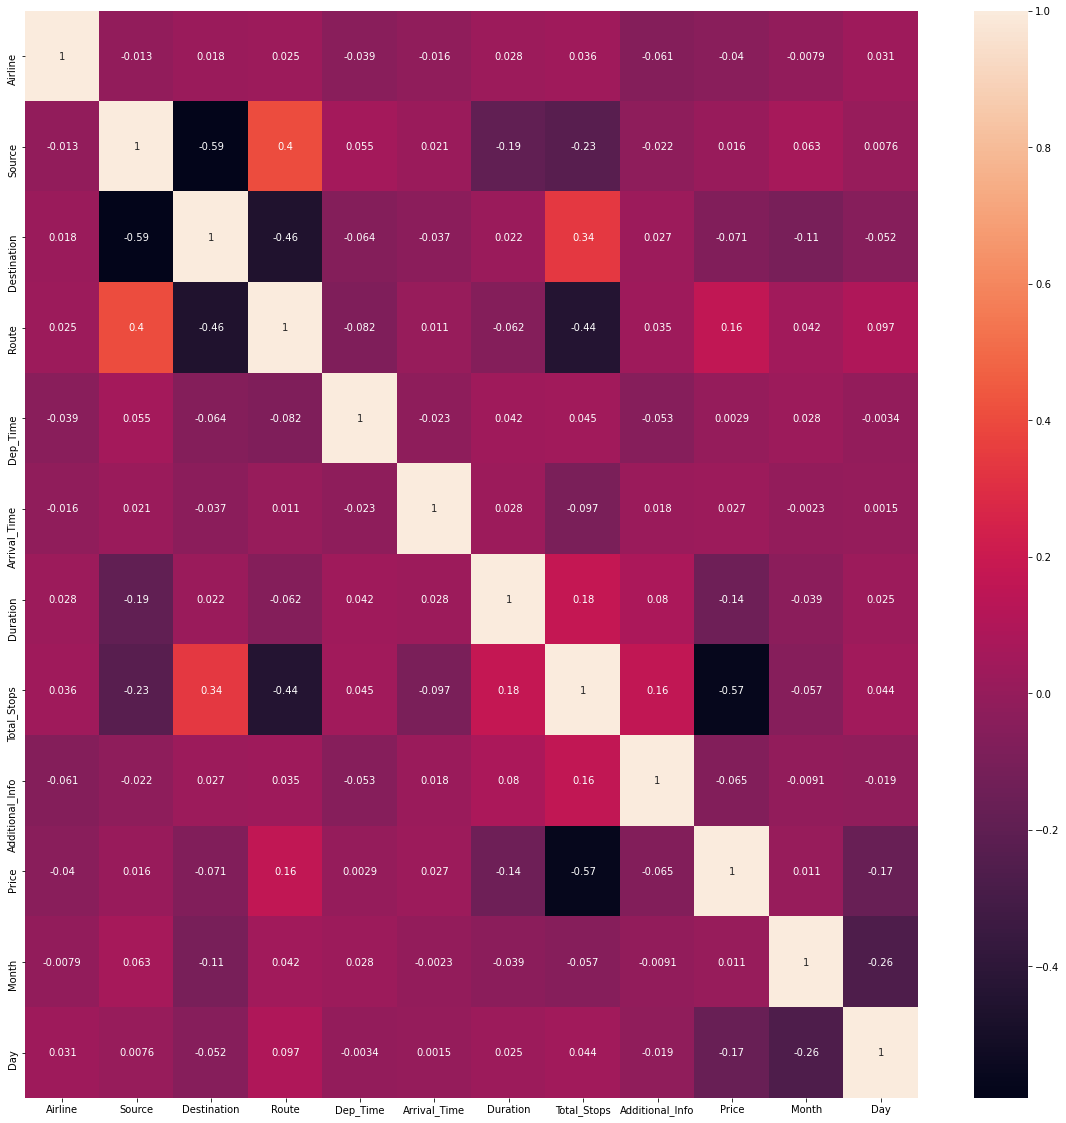

In [24]:
plt.figure(figsize=(20,20))
sn.heatmap(df.corr(),annot=True)

In [25]:
y = df['Price']
x = df
x.drop('Price',axis = 1, inplace = True)

In [26]:
df_test= pd.read_csv("Test_set.csv")
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [27]:
df_test.shape

(2671, 10)

In [28]:
df_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [29]:
df_test['Month'] = pd.DatetimeIndex(df_test['Date_of_Journey']).month
df_test['Day'] = pd.DatetimeIndex(df_test['Date_of_Journey']).day
df_test['Year'] = pd.DatetimeIndex(df_test['Date_of_Journey']).year

In [30]:
df_test=df_test.drop("Date_of_Journey",axis=1)

In [31]:
for i in col:
    df_test[i] = le.fit_transform(df_test[i])
df_test.dtypes
   

Airline            int32
Source             int32
Destination        int32
Route              int32
Dep_Time           int32
Arrival_Time       int32
Duration           int32
Total_Stops        int32
Additional_Info    int32
Month              int64
Day                int64
Year               int64
dtype: object

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.41067545, -1.65844074,  2.41666505, ...,  0.49989167,
        -0.84850298,  1.28563248],
       [-1.26099927,  0.89005213, -0.97382594, ...,  0.49989167,
        -1.5179928 , -0.8726517 ],
       [ 0.01448647,  0.04055451, -0.29572775, ...,  0.49989167,
         1.15996647, -0.7590578 ],
       ...,
       [ 0.01448647, -1.65844074,  0.38237045, ...,  0.49989167,
        -0.51375808,  1.62641419],
       [ 2.56545795, -1.65844074,  2.41666505, ...,  0.49989167,
        -1.5179928 , -1.09983951],
       [-1.26099927,  0.04055451, -0.29572775, ...,  0.49989167,
         1.15996647, -0.8726517 ]])

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lr = LinearRegression()
lr.fit(X_train,y_train)
pred= lr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.3810961161983528
Mean absolute error =  2617.9178506533617
Mean Squared error =  12642581.687176695
Root Mean Sqaured Error=  3555.640826514497


In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cv_score = cross_val_score(lr,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.37076305842616897

In [37]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred= dtr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.820616069458391
Mean absolute error =  696.1847622613253
Mean Squared error =  3664342.8076563086
Root Mean Sqaured Error=  1914.2473214442036


In [38]:
cv_score = cross_val_score(dtr,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.8172461176184453

In [39]:
from sklearn.ensemble import RandomForestRegressor
  
rfr = RandomForestRegressor(n_estimators = 100, random_state = 12)
rfr.fit(X_train, y_train) 
pred= rfr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.8978096083242297
Mean absolute error =  644.9978149569449
Mean Squared error =  2087481.4461813343
Root Mean Sqaured Error=  1444.8119068520077


In [40]:
cv_score = cross_val_score(rfr,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.8884095359653822

In [41]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha= 0.1,random_state= 0)
lasso.fit(X_train, y_train) 
pred= lasso.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.38109678467410646
Mean absolute error =  2617.9029877108896
Mean Squared error =  12642568.031971836
Root Mean Sqaured Error=  3555.638906296847


In [42]:
cv_score = cross_val_score(lasso,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.3707634290798092

In [43]:
 from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train, y_train) 
pred= knr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.7262279817558357
Mean absolute error =  1392.0026207412955
Mean Squared error =  5592443.6651691
Root Mean Sqaured Error=  2364.834807162881


In [44]:
cv_score = cross_val_score(knr,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.5897586285551351

In [45]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha= 0.001,random_state= 0)
ridge.fit(X_train, y_train) 
pred= ridge.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.3810961176518196
Mean absolute error =  2617.917845701079
Mean Squared error =  12642581.657486185
Root Mean Sqaured Error=  3555.640822339369


In [46]:
cv_score = cross_val_score(ridge,x,y,cv=3)
cv_mean = cv_score.mean()
cv_mean

0.3709385805996404

<b>Hyper parameter tuning<b>

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parameter = { 
           'criterion':['mse', 'mae'],
          'max_features':['auto', 'sqrt'],
       'n_estimators': [100, 200, 300]
}

In [49]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=3)

In [50]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]})

In [51]:
GCV.best_params_

{'criterion': 'mse', 'max_features': 'sqrt', 'n_estimators': 300}

In [55]:
from sklearn.metrics import accuracy_score

In [58]:
Final_mod = RandomForestRegressor(criterion='mse',n_estimators=300,max_features='sqrt')
Final_mod.fit(X_train,y_train)
pred = Final_mod.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.8917355574709007
Mean absolute error =  751.5463118647025
Mean Squared error =  2211558.3603761205
Root Mean Sqaured Error=  1487.1309156816426


<b>Saving the model<b>

In [63]:
import joblib
joblib.dump(Final_mod,"FlightPricePrediction.pkl")

['FlightPricePrediction.pkl']

In [64]:
loaded_model = joblib.load('FlightPricePrediction.pkl')

In [69]:
df_test=df_test.drop("Year",axis=1)

In [70]:
result = loaded_model.predict(df_test)
print(result)

[11268.48       11273.75333333 11268.48       ... 11268.48
 11464.14       11268.48      ]
